<a href="https://colab.research.google.com/github/evanparisya/PCVK25_3F_09/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

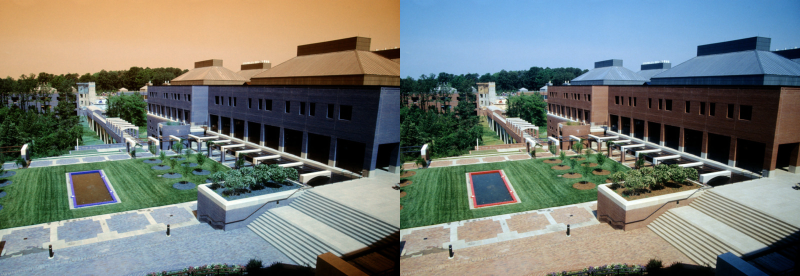



resolusi image: tinggi x lebar =  276  x  400


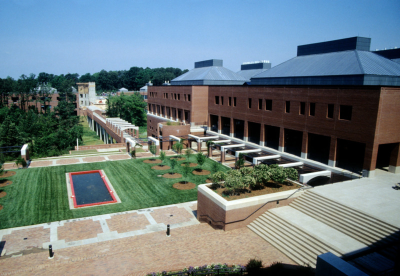

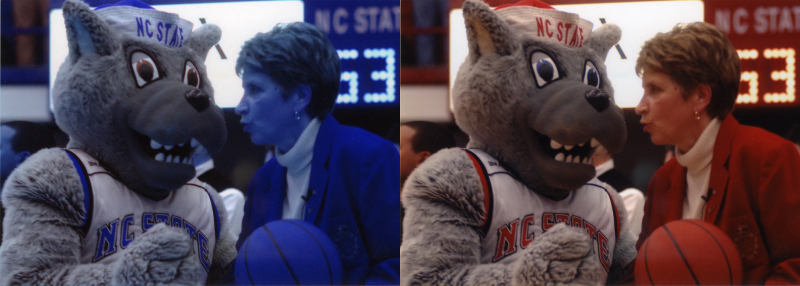



resolusi image: tinggi x lebar =  286  x  400


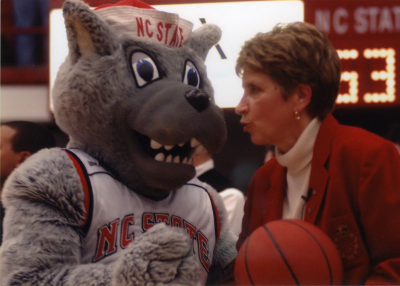

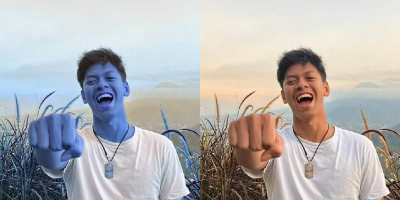



resolusi image: tinggi x lebar =  200  x  200


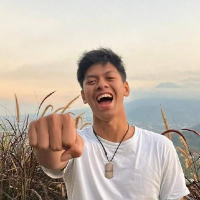

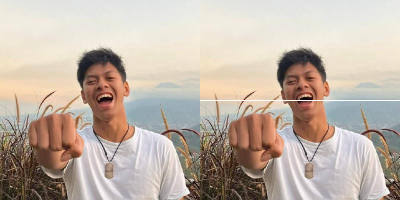

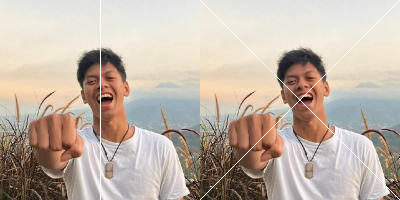

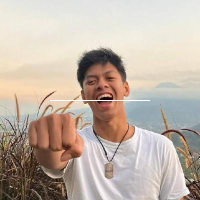

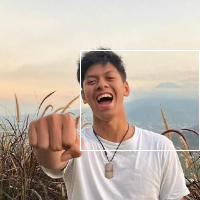

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow  # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://avatars.githubusercontent.com/u/144124511?s=400&u=a7a4d5bf5db5525c5210c4c7b080ad1287d52c46&v=4"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                      # read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)  # resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)   # convert color to RGB
    final_frame = cv.hconcat([image, image_2])       # concatenate image
    cv2_imshow(final_frame)                          # show image
    print('\n')

# Langkah 3
    tinggi = image_2.shape[0]
    lebar = image_2.shape[1]
    print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
    cv2_imshow(image_2)

#Langkah 4
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal ditengah image
for y in range(lebar):
    image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM D2
# Soal 2
image_vertikal = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_silang = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Membuat garis vertikal di tengah
for x in range(tinggi):
    image_vertikal[x, int(lebar/2)] = [255, 255, 255]

# Membuat garis diagonal silang (X)
for i in range(min(tinggi, lebar)):
    # diagonal ↘
    image_silang[i, i] = [255, 255, 255]
    # diagonal ↙
    image_silang[i, lebar - 1 - i] = [255, 255, 255]
final_frame = cv.hconcat((image_vertikal, image_silang))
cv2_imshow(final_frame)

# Soal 3
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# tentukan panjang garis
panjang = lebar // 2

# titik awal dan akhir (biar garis berada di tengah horizontal)
start = (lebar - panjang) // 2
end   = start + panjang

# buat garis horizontal di tengah
for y in range(start, end):
    image_3[int(tinggi/2), y] = [255, 255, 255]
cv2_imshow(image_3)

# Soal 4
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# koordinat kotak (bisa diatur sembarang)
x1, y1 = 50, 80    # titik kiri-atas (row, col)
x2, y2 = 150, 200  # titik kanan-bawah (row, col)

# gambar sisi atas dan bawah
for y in range(y1, min(y2, lebar)):
    image_3[x1, y] = [255, 255, 255]  # atas
    image_3[min(x2, tinggi-1), y] = [255, 255, 255]  # bawah

# gambar sisi kiri dan kanan
for x in range(x1, min(x2, tinggi)):
    image_3[x, y1] = [255, 255, 255]  # kiri
    image_3[x, min(y2, lebar-1)] = [255, 255, 255]  # kanan
cv2_imshow(image_3)

1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan
menggunakan Google Colab?

    jawaban :

    Lingkungan cloud-based gratis sehingga tidak perlu instalasi Python atau library di komputer lokal.

    Akses ke CPU/GPU gratis untuk mempercepat eksekusi terutama untuk pengolahan citra.

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke
delapan? Apakah semua library tersebut harus digunakan dalam praktikum
sesi ini?

    jawaban :
    
    OpenCV (cv2) → untuk membaca, menampilkan, memproses, dan mengubah citra.

    NumPy → untuk mengolah data array dan operasi numerik pada citra (karena citra disimpan dalam bentuk array).

    Matplotlib → untuk menampilkan citra dan membuat visualisasi.

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :

    Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak
    dilakukan?

    jawaban :

    Kegunaan kode tersebut: untuk mengubah ukuran (resize) gambar menjadi setengah dari ukuran aslinya (karena fx=0.5, fy=0.5).

    Pengaruh jika tidak dilakukan gambar akan tetap berukuran asli. Jika gambar aslinya terlalu besar, bisa membuat proses komputasi lebih lambat, sulit ditampilkan di layar, dan memakan banyak memori.
4. Perhatikan potongan kode progam berikut :

    Apakah kegunaan kode [255,255,255] ? Jelaskan!

    jawaban :

    Kegunaan [255,255,255] → merepresentasikan warna putih dalam format RGB.

    kode ini menggambar garis horizontal berwarna putih di tengah gambar, sepanjang lebar citra.
5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun
rendah!

    jawaban :

    Pixel adalah unit terkecil dari sebuah gambar digital, tiap pixel punya nilai warna.

    Resolusi gambar adalah jumlah pixel dalam lebar × tinggi gambar (misal 1920×1080).

    Gambar dengan resolusi tinggi → memiliki lebih banyak pixel → detail lebih jelas dan tajam.

    Gambar dengan resolusi rendah → jumlah pixel lebih sedikit → detail hilang, gambar terlihat pecah jika diperbesar.